In [1]:

#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve, classification_report, roc_auc_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize


In [2]:
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('feature_tt.csv')
df1=df[['RMSbetaLow', 'MeanalphaHigh', 'MedianbetaHigh', 'MeanbetaHigh', 'StdDeviaalphaLow', 'RMSalphaLow', 'MeanalphaLow', 'RMSbetaHigh', 'StdDeviabetaLow', 'MeanDelta', 'MedianbetaLow', 'MeanbetaLow', 'StdDeviabetaHigh', 'MedianDelta', 'RMSgammaMid', 'MeanTheta', 'StdDeviagammaLow', 'MediangammaLow', 'StdDeviaDelta', 'RMSDelta', 'MeangammaMid', 'RMSTheta']]
#df1

In [10]:
df = pd.read_csv('advanced_feature.csv')
df2=df[['EnergySTFTAlphaLow',
 'EnergyFFTAlphaLow',
 'EnergyDWTcDBetaHigh',
 'EnergyDWTcABetaHigh',
 'EnergyDWTcDTheta',
 'EnergyDWTcDBetaLow',
 'EnergyDWTcDGammaMid',
 'EnergyDWTcAGammaMid',
 'EnergyWVDBetaLow',
 'EnergyDCTDelta',
 'EnergyDWTcATheta',
 'EnergyDWTcDDelta',
 'EnergyDWTcDAlphaLow',
 'EnergyDWTcAAlphaLow',
 'EnergyDWTcABetaLow', 'Level']]
#df1

In [11]:
df3 = pd.concat([df1,df2], axis=1)

df3

,RMSbetaLow,MeanalphaHigh,MedianbetaHigh,MeanbetaHigh,StdDeviaalphaLow,RMSalphaLow,MeanalphaLow,RMSbetaHigh,StdDeviabetaLow,MeanDelta,...,EnergyDWTcDGammaMid,EnergyDWTcAGammaMid,EnergyWVDBetaLow,EnergyDCTDelta,EnergyDWTcATheta,EnergyDWTcDDelta,EnergyDWTcDAlphaLow,EnergyDWTcAAlphaLow,EnergyDWTcABetaLow,Level
0,5.772452e+06,8.762346e+05,12142.0,1.435115e+06,7497253.216,8725686.368,4.569627e+06,4.876462e+06,5.460069e+06,8.678004e+05,...,1.400000e+14,1.400000e+14,6.030000e+32,4.300000e+16,1.730000e+15,1.470000e+14,1.670000e+15,2.820000e+15,9.840000e+14,1
1,5.343420e+06,2.582831e+06,12137.0,1.156911e+06,6064599.287,6544896.240,2.584508e+06,4.363295e+06,5.101065e+06,1.850794e+06,...,1.400000e+14,1.400000e+14,6.030000e+32,4.300000e+16,1.730000e+15,1.470000e+14,1.670000e+15,2.820000e+15,9.840000e+14,1
2,5.343258e+06,2.868807e+06,15233.0,2.852984e+06,6566936.626,7236818.781,3.158768e+06,6.898936e+06,5.100007e+06,1.134943e+06,...,2.810000e+14,2.820000e+14,4.530000e+32,1.350000e+17,2.400000e+15,3.880000e+14,1.250000e+15,1.270000e+15,8.510000e+14,1
3,4.877045e+06,2.012726e+06,14259.0,2.568181e+06,6995135.289,7866435.954,3.711907e+06,6.546285e+06,4.701021e+06,1.170896e+06,...,1.400000e+14,1.410000e+14,4.530000e+32,7.950000e+16,1.430000e+15,2.810000e+14,1.250000e+15,1.840000e+15,1.120000e+15,1
4,5.769501e+06,2.578454e+06,13064.0,2.003362e+06,6067118.872,6546612.020,2.583040e+06,5.771010e+06,5.455125e+06,9.273475e+05,...,1.400000e+14,1.410000e+14,3.740000e+32,8.040000e+16,1.270000e+15,2.770000e+14,1.260000e+15,2.390000e+15,7.030000e+14,1
5,3.087501e+06,1.431704e+06,14822.0,1.717931e+06,4245505.871,4364929.113,1.154895e+06,5.340666e+06,3.058955e+06,1.758434e+06,...,1.400000e+14,1.410000e+14,5.390000e+32,4.530000e+16,2.420000e+15,1.510000e+14,1.260000e+15,1.270000e+15,9.840000e+14,1
6,3.086194e+06,1.430245e+06,13676.0,1.152914e+06,4702936.253,4878599.970,1.434574e+06,4.362601e+06,3.057050e+06,3.203405e+06,...,6.994922e+08,4.346744e+09,1.420000e+32,1.900000e+17,9.940000e+14,4.140000e+14,5.620000e+14,5.630000e+14,5.620000e+14,1
7,3.784382e+06,1.436648e+06,11887.0,1.465636e+06,4703956.541,4879919.789,1.435774e+06,4.884573e+06,3.709627e+06,2.478076e+06,...,1.400000e+14,1.400000e+14,1.490000e+32,4.060000e+17,3.800000e+15,1.060000e+15,7.010000e+14,7.040000e+14,2.810000e+14,1
8,9.411751e+03,1.299737e+06,9612.5,1.298073e+06,4547904.731,4644582.119,1.297776e+06,4.646154e+06,6.040157e+03,2.177326e+06,...,9.309230e+10,5.610000e+14,2.300000e+32,3.090000e+17,2.530000e+15,8.340000e+14,7.010000e+14,7.040000e+14,8.440000e+14,1
9,4.362828e+06,1.434990e+06,15049.0,1.998384e+06,4697939.775,4878558.603,1.450439e+06,5.768938e+06,4.245477e+06,2.580703e+06,...,4.528860e+08,1.382986e+09,1.490000e+20,5.040000e+16,1.410000e+14,4.010000e+14,2.800000e+14,2.810000e+14,1.893051e+09,1


In [13]:
df3['split'] = np.random.randn(df3.shape[0], 1)

msk = np.random.rand(len(df3)) <= 0.7

train = df3[msk]
test = df3[~msk]

x = train.drop("Level", axis=1)
y = train["Level"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    xgb.XGBClassifier(),
    
    ]



MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    #fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    #MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    #MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    #MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    



    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy
18,XGBClassifier,1.0000,0.8621
4,RandomForestClassifier,0.9882,0.7931
3,GradientBoostingClassifier,1.0000,0.6897
17,DecisionTreeClassifier,1.0000,0.6552
2,ExtraTreesClassifier,1.0000,0.5862
1,BaggingClassifier,0.9647,0.5517
16,LinearSVC,0.2941,0.4483
0,AdaBoostClassifier,0.4471,0.4483
7,PassiveAggressiveClassifier,0.2588,0.3793
10,Perceptron,0.2471,0.3793


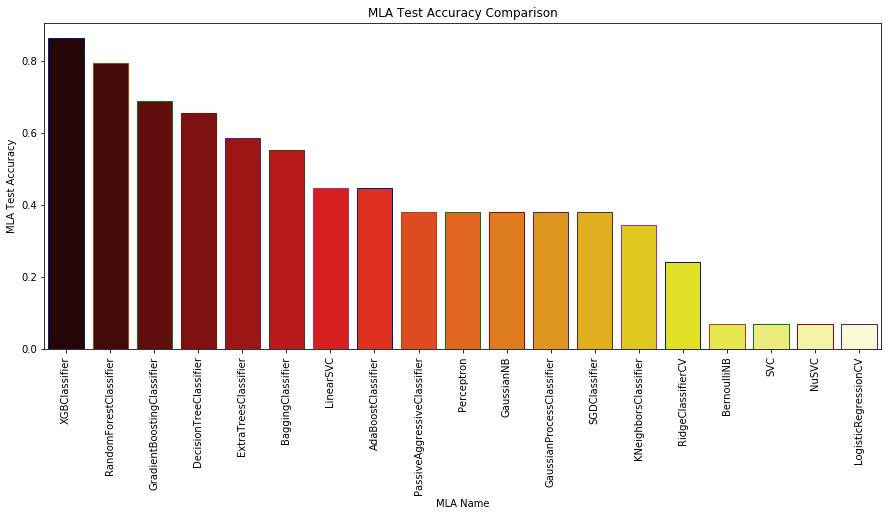

In [14]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

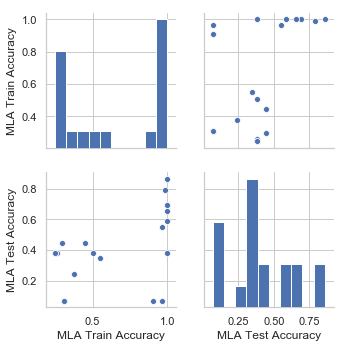

In [15]:
sns.set(style="whitegrid")
sns.pairplot(data=MLA_compare)

In [16]:
classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n           1       0.25      0.50      0.33         2\n           2       0.89      0.89      0.89         9\n           3       1.00      0.86      0.92         7\n           4       1.00      0.91      0.95        11\n\n    accuracy                           0.86        29\n   macro avg       0.78      0.79      0.77        29\nweighted avg       0.91      0.86      0.88        29\n'

In [17]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [18]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

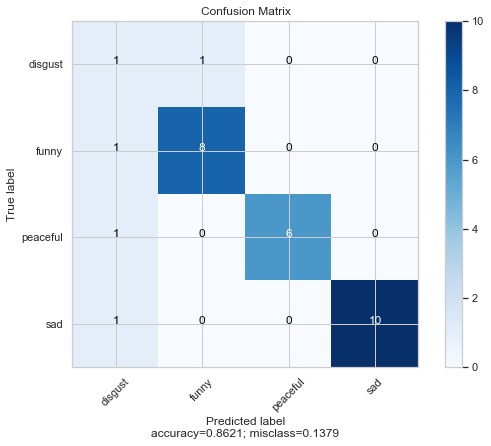

In [19]:
#not normalized
plot_confusion_matrix(cm           = confusion_matrix(y_test, predicted),
                      normalize    = False,
                      target_names = ['disgust', 'funny', 'peaceful', 'sad'],
                      title        = "Confusion Matrix")

In [20]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve, classification_report, roc_auc_score
from sklearn import metrics

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    #fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission(Macro)'] = precision_score(y_test, predicted, average="macro")
    MLA_compare.loc[row_index, 'MLA Precission(Micro)'] = precision_score(y_test, predicted, average="micro")
    MLA_compare.loc[row_index, 'MLA Precission(Weighted)'] = precision_score(y_test, predicted, average="weighted")
    MLA_compare.loc[row_index, 'MLA Recall(macro)'] = recall_score(y_test, predicted, average="macro")
    MLA_compare.loc[row_index, 'MLA Recall(micro)'] = recall_score(y_test, predicted, average="micro")
    MLA_compare.loc[row_index, 'MLA Recall(weighted)'] = recall_score(y_test, predicted, average="weighted")
    #MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    MLA_compare.loc[row_index, 'F1 Score(Macro)'] = metrics.f1_score(y_test, predicted, average="macro")
    MLA_compare.loc[row_index, 'F1 Score(Micro)'] = metrics.f1_score(y_test, predicted, average="micro")
    MLA_compare.loc[row_index, 'F1 Score(Weighted)'] = metrics.f1_score(y_test, predicted, average="weighted")



    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission(Macro),MLA Precission(Micro),MLA Precission(Weighted),MLA Recall(macro),MLA Recall(micro),MLA Recall(weighted),F1 Score(Macro),F1 Score(Micro),F1 Score(Weighted)
18,XGBClassifier,1.0000,0.8621,0.784722,0.862069,0.913793,0.788781,0.862069,0.862069,0.774420,0.862069,0.882910
1,BaggingClassifier,1.0000,0.7586,0.762500,0.758621,0.900000,0.796898,0.758621,0.758621,0.712487,0.758621,0.800014
3,GradientBoostingClassifier,1.0000,0.6552,0.684821,0.655172,0.813054,0.611291,0.655172,0.655172,0.602354,0.655172,0.708430
17,DecisionTreeClassifier,1.0000,0.6552,0.690972,0.655172,0.819923,0.616342,0.655172,0.655172,0.608289,0.655172,0.711857
2,ExtraTreesClassifier,1.0000,0.5862,0.732955,0.586207,0.848746,0.652958,0.586207,0.586207,0.545303,0.586207,0.606473
4,RandomForestClassifier,0.9882,0.5862,0.720238,0.586207,0.853859,0.668110,0.586207,0.586207,0.585967,0.586207,0.656967
0,AdaBoostClassifier,0.4471,0.4483,0.534314,0.448276,0.640297,0.348846,0.448276,0.448276,0.333993,0.448276,0.429825
10,Perceptron,0.2471,0.3793,0.094828,0.379310,0.143876,0.250000,0.379310,0.379310,0.137500,0.379310,0.208621
12,GaussianNB,0.5059,0.3793,0.333333,0.379310,0.395402,0.480519,0.379310,0.379310,0.316399,0.379310,0.356875
5,GaussianProcessClassifier,1.0000,0.3793,0.094828,0.379310,0.143876,0.250000,0.379310,0.379310,0.137500,0.379310,0.208621
